In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import  seaborn as sns

In [2]:
data = pd.read_csv('/kaggle/input/fraud-detection-dataset/AIML Dataset.csv')

**Data Preprocessing**

In [3]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [5]:
data.info

<bound method DataFrame.info of          step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155            0.00            0.00        0   
1

In [8]:
data.drop(['step'] , axis = 1 , inplace = True)

In [10]:
data.duplicated().sum()

0

In [12]:
data.tail()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [13]:
data.isnull().sum()

type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

<Axes: xlabel='isFraud'>

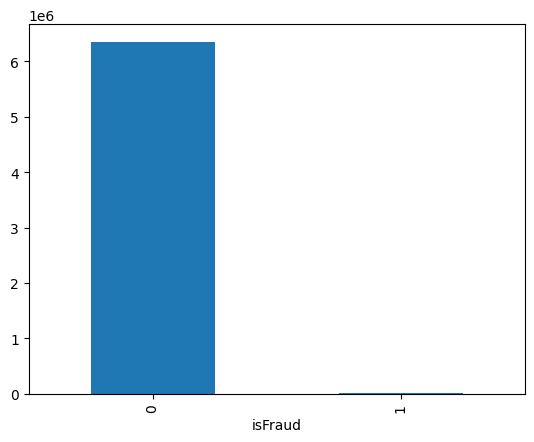

In [16]:
data['isFraud'].value_counts().plot(kind= "bar")

In [18]:
data['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

<Axes: ylabel='count'>

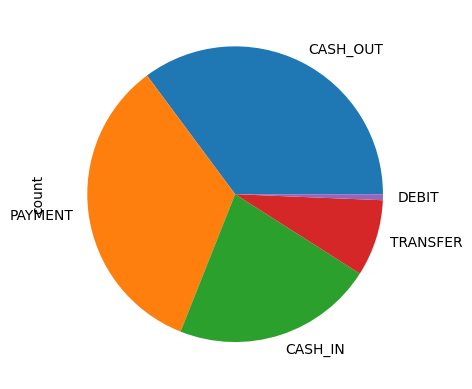

In [42]:
data['type'].value_counts().plot(kind= "pie")

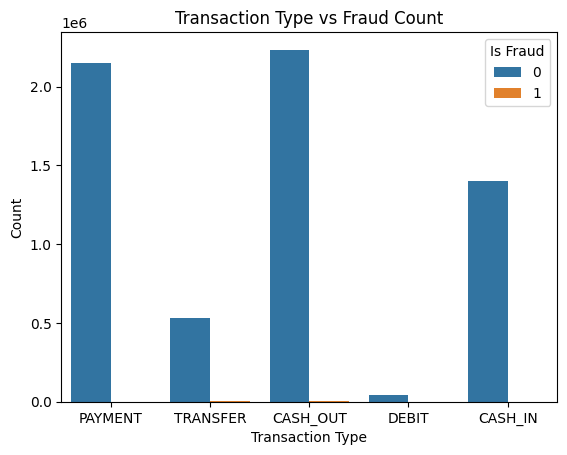

In [20]:
# Plot
sns.countplot(data=data, x='type', hue='isFraud')

# Beautify
plt.title("Transaction Type vs Fraud Count")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.legend(title="Is Fraud")
plt.show()

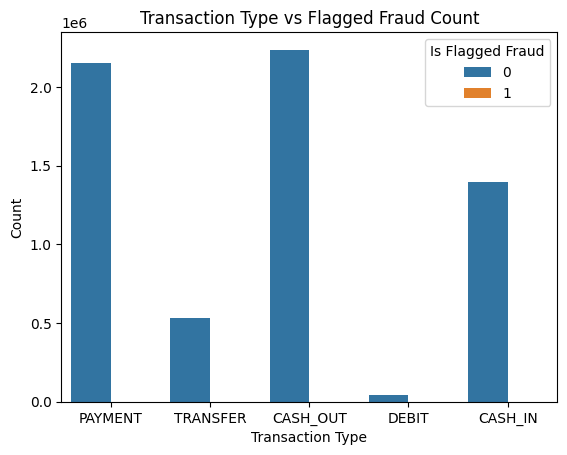

In [21]:
# Plot
sns.countplot(data=data, x='type', hue='isFlaggedFraud')

# Beautify
plt.title("Transaction Type vs Flagged Fraud Count")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.legend(title="Is Flagged Fraud")
plt.show()

**Label Encoding**

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [46]:
le = LabelEncoder()
data['type']  = le.fit_transform(data['type'])

In [58]:
data['type']

0          3
1          3
2          4
3          1
4          3
          ..
6362615    1
6362616    4
6362617    1
6362618    4
6362619    1
Name: type, Length: 6362620, dtype: int64

In [82]:
data['type'].unique

<bound method Series.unique of 0          3
1          3
2          4
3          1
4          3
          ..
6362615    1
6362616    4
6362617    1
6362618    4
6362619    1
Name: type, Length: 6362620, dtype: int64>

**Spliting the Data**

In [48]:
X = data.drop('isFraud', axis=1)
y = data['isFraud']
X_train,X_test, y_train,y_test = train_test_split(X,y , test_size=0.3)

In [49]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4453834, 6)
(4453834,)
(1908786, 6)
(1908786,)


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   type            int64  
 1   amount          float64
 2   oldbalanceOrg   float64
 3   newbalanceOrig  float64
 4   oldbalanceDest  float64
 5   newbalanceDest  float64
 6   isFraud         int64  
dtypes: float64(5), int64(2)
memory usage: 339.8 MB


**Model Building**

In [54]:

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1903068    3256]
 [    557    1905]]


0.9980023952396968

In [2]:

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
    plt.title('Logistic Regression - Confusion Matrix ')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.show()

NameError: name 'plt' is not defined

**Making a Prediction**

In [61]:
# Sample new transaction (make sure it has same columns as training data)
# Let's say this is a CASH_OUT transaction
sample = {
    'type': 3,
     'amount': 339682.13,
    'oldbalanceOrg': 339682.13,
    'newbalanceOrig': 0.0,
    'oldbalanceDest': 0.00,
    'newbalanceDest': 339682.13
}


# Convert to DataFrame and predict
sample_df = pd.DataFrame([sample])
prediction = classifier.predict(sample_df)

print("✅ Fraud Detected!" if prediction[0] == 1 else "❌ Not Fraud")


✅ Fraud Detected!


**Front-end**

In [63]:
pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 34.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 96.6 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [64]:
import gradio as gr

In [81]:

import joblib  # or use your trained model directly if in memory

def predictor(amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest, type):
    # One-hot encode the `type`
    type_encoder = LabelEncoder()
    type_encoder.fit(['CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER'])
    sample = {
        'amount': amount,
        'oldbalanceOrg': oldbalanceOrg,
        'newbalanceOrig': newbalanceOrig,
        'oldbalanceDest': oldbalanceDest,
        'newbalanceDest': newbalanceDest,
        'type': type_encoder.transform([type])[0],
    }

    # Add one-hot encoded type columns
    # for t in type_options:
    #     sample[f'{t}'] = 1 if type == t else 0

    # Convert to DataFrame and predict
    sample_df = pd.DataFrame([sample])
    prediction = classifier.predict(sample_df)

    return "✅ Fraud Detected!" if prediction[0] == 1 else "❌ Not Fraud"

# Gradio interface
demo = gr.Interface(
    fn=predictor,
    inputs=[
        gr.Number(label="Transaction Amount"),
        gr.Number(label="Old Balance (Origin)"),
        gr.Number(label="New Balance (Origin)"),
        gr.Number(label="Old Balance (Destination)"),
        gr.Number(label="New Balance (Destination)"),
        gr.Dropdown(choices=["CASH_OUT-0", "DEBIT-1", "PAYMENT-2", "TRANSFER-3"], label="Transaction Type")
    ],
    outputs=gr.Label(label="Fraud Prediction"),
    title="💳 Fraud Detection Demo",
    description="Enter transaction details to predict whether it's fraudulent."
)

# Run the app
if __name__ == "__main__":
    demo.launch()


* Running on local URL:  http://127.0.0.1:7865
It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

* Running on public URL: https://1d34045e6d67e39796.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/gradio/queueing.py", line 625, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/gradio/route_utils.py", line 322, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/gradio/blocks.py", line 2136, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/gradio/blocks.py", line 1662, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ignore
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/anyio/to_thread.py", line 33, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
           ^^^^^^^^^^